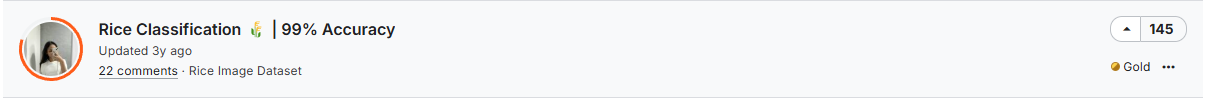

In [1]:
import os
import numpy as np
import glob
import cv2
import pathlib
import PIL.Image as Image


import matplotlib.pyplot as plt
import matplotlib.image as img


from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow.keras import Model


In [2]:
data_dir = r"D:\code_study\ML_CODE\dataSets\Rice_Image_Dataset\Rice_Image_Dataset" # Datasets path
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('D:/code_study/ML_CODE/dataSets/Rice_Image_Dataset/Rice_Image_Dataset')

In [3]:
arborio = list(data_dir.glob('Arborio/*'))[:600]
basmati = list(data_dir.glob('Basmati/*'))[:600]
ipsala = list(data_dir.glob('Ipsala/*'))[:600]
jasmine = list(data_dir.glob('Jasmine/*'))[:600]
karacadag = list(data_dir.glob('Karacadag/*'))[:600]

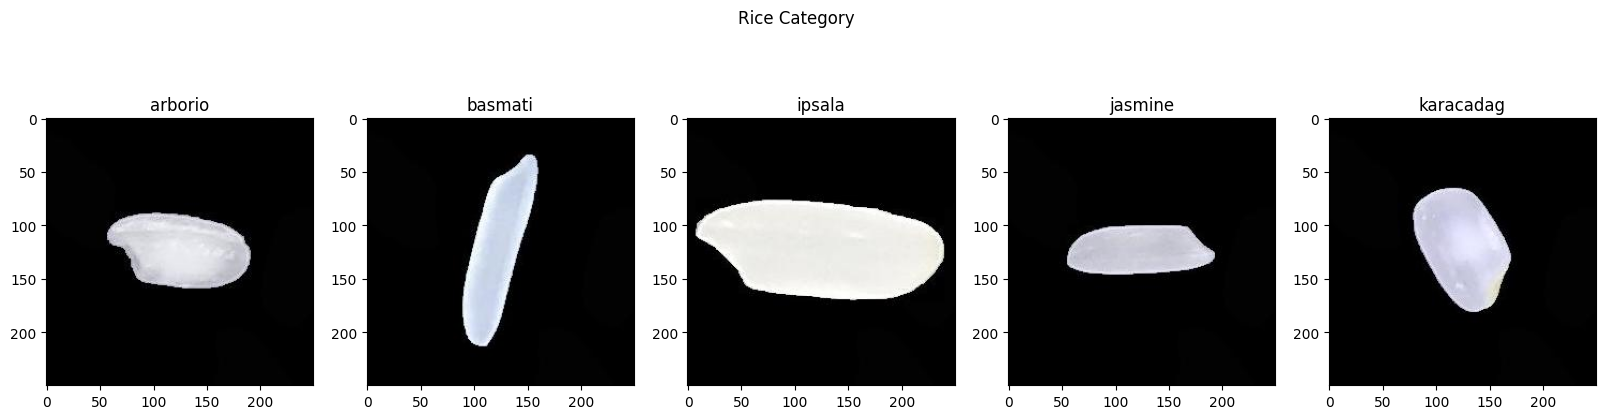

In [4]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
arborio_image = img.imread(arborio[0])
basmati_image = img.imread(basmati[0])
ipsala_image = img.imread(ipsala[0])
jasmine_image = img.imread(jasmine[0])
karacadag_image = img.imread(karacadag[0])

ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')


ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)

In [5]:
# Contains the images path
df_images = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag': karacadag
}

# Contains numerical labels for the categories
df_labels = {
    'arborio' : 0,
    'basmati' : 1,
    'ipsala' : 2,
    'jasmine' : 3,
    'karacadag': 4
}

In [6]:
img = cv2.imread(str(df_images['arborio'][0])) # Converting it into numerical arrays
img.shape # Its currently 250 by 250 by 3

(250, 250, 3)

In [7]:
X, y = [], [] # X = images, y = labels
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) # Resizing the images to be able to pass on MobileNetv2 model
        X.append(resized_img) 
        y.append(df_labels[label])

In [8]:
# Standarizing
X = np.array(X)
X = X/255
y = np.array(y)

In [9]:
# Separating data into training, test and validation sets
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

In [10]:
print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)

print(X_test.shape)
print(y_test.shape)

(2250, 224, 224, 3)
(2250,)
(188, 224, 224, 3)
(188,)
(562, 224, 224, 3)
(562,)


In [22]:
#mobile_net = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4' # MobileNetv4 link
mobile_net = r"D:\code_study\ML_CODE\kaggle\Classfication\Rice Image Dataset(Multi Classification)\RiceClassification_Acc99\mobilenet-v2-tensorflow2-035-224-classification-v2"
mobile_net = hub.KerasLayer(
        mobile_net, input_shape=(224,224, 3), trainable=False) # Removing the last layer

In [23]:
num_label = 5 # number of labels

model = keras.Sequential([
    mobile_net,
    keras.layers.Dense(num_label, activation='softmax')
])


In [24]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
71/71 [==============================] - 6s 37ms/step - loss: 0.8822 - acc: 0.6607 - val_loss: 0.1452 - val_acc: 0.9468
Epoch 2/10
71/71 [==============================] - 2s 23ms/step - loss: 0.1267 - acc: 0.9695 - val_loss: 0.1054 - val_acc: 0.9574
Epoch 3/10
71/71 [==============================] - 2s 23ms/step - loss: 0.0804 - acc: 0.9823 - val_loss: 0.0735 - val_acc: 0.9734
Epoch 4/10
71/71 [==============================] - 2s 23ms/step - loss: 0.0595 - acc: 0.9851 - val_loss: 0.0636 - val_acc: 0.9734
Epoch 5/10
71/71 [==============================] - 2s 23ms/step - loss: 0.0479 - acc: 0.9903 - val_loss: 0.0455 - val_acc: 0.9840
Epoch 6/10
71/71 [==============================] - 2s 23ms/step - loss: 0.0501 - acc: 0.9855 - val_loss: 0.0399 - val_acc: 0.9894
Epoch 7/10
71/71 [==============================] - 2s 23ms/step - loss: 0.0411 - acc: 0.9901 - val_loss: 0.0379 - val_acc: 0.9840
Epoch 8/10
71/71 [==============================] - 2s 23ms/step - loss: 0.0326 - a

In [25]:
model.evaluate(X_test,y_test)

18/18 [==============================] - 1s 40ms/step - loss: 0.0325 - acc: 0.9964


[0.03248526528477669, 0.9964413046836853]

In [26]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

9/9 [==============================] - 1s 81ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       118
           1       1.00      0.99      1.00       105
           2       1.00      1.00      1.00       117
           3       0.99      1.00      1.00       125
           4       0.99      1.00      0.99        97

    accuracy                           1.00       562
   macro avg       1.00      1.00      1.00       562
weighted avg       1.00      1.00      1.00       562



In [27]:
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas as pd

init_notebook_mode(connected=True)

acc = pd.DataFrame({'train': history.history['acc'], 'val': history.history['val_acc']})

fig = px.line(acc, x=acc.index, y=acc.columns[0::], title='Training and Evaluation Accuracy every Epoch', markers=True)
fig.show()